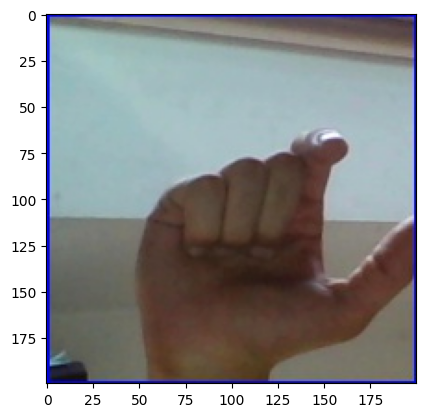

In [1]:
import matplotlib.pyplot as plt
path = "/Users/teodorastereciu/PycharmProjects/mlp/data/asl_train/asl_alphabet_train/T/T11.jpg"
img = plt.imread(path)

plt.imshow(img, cmap='gray')

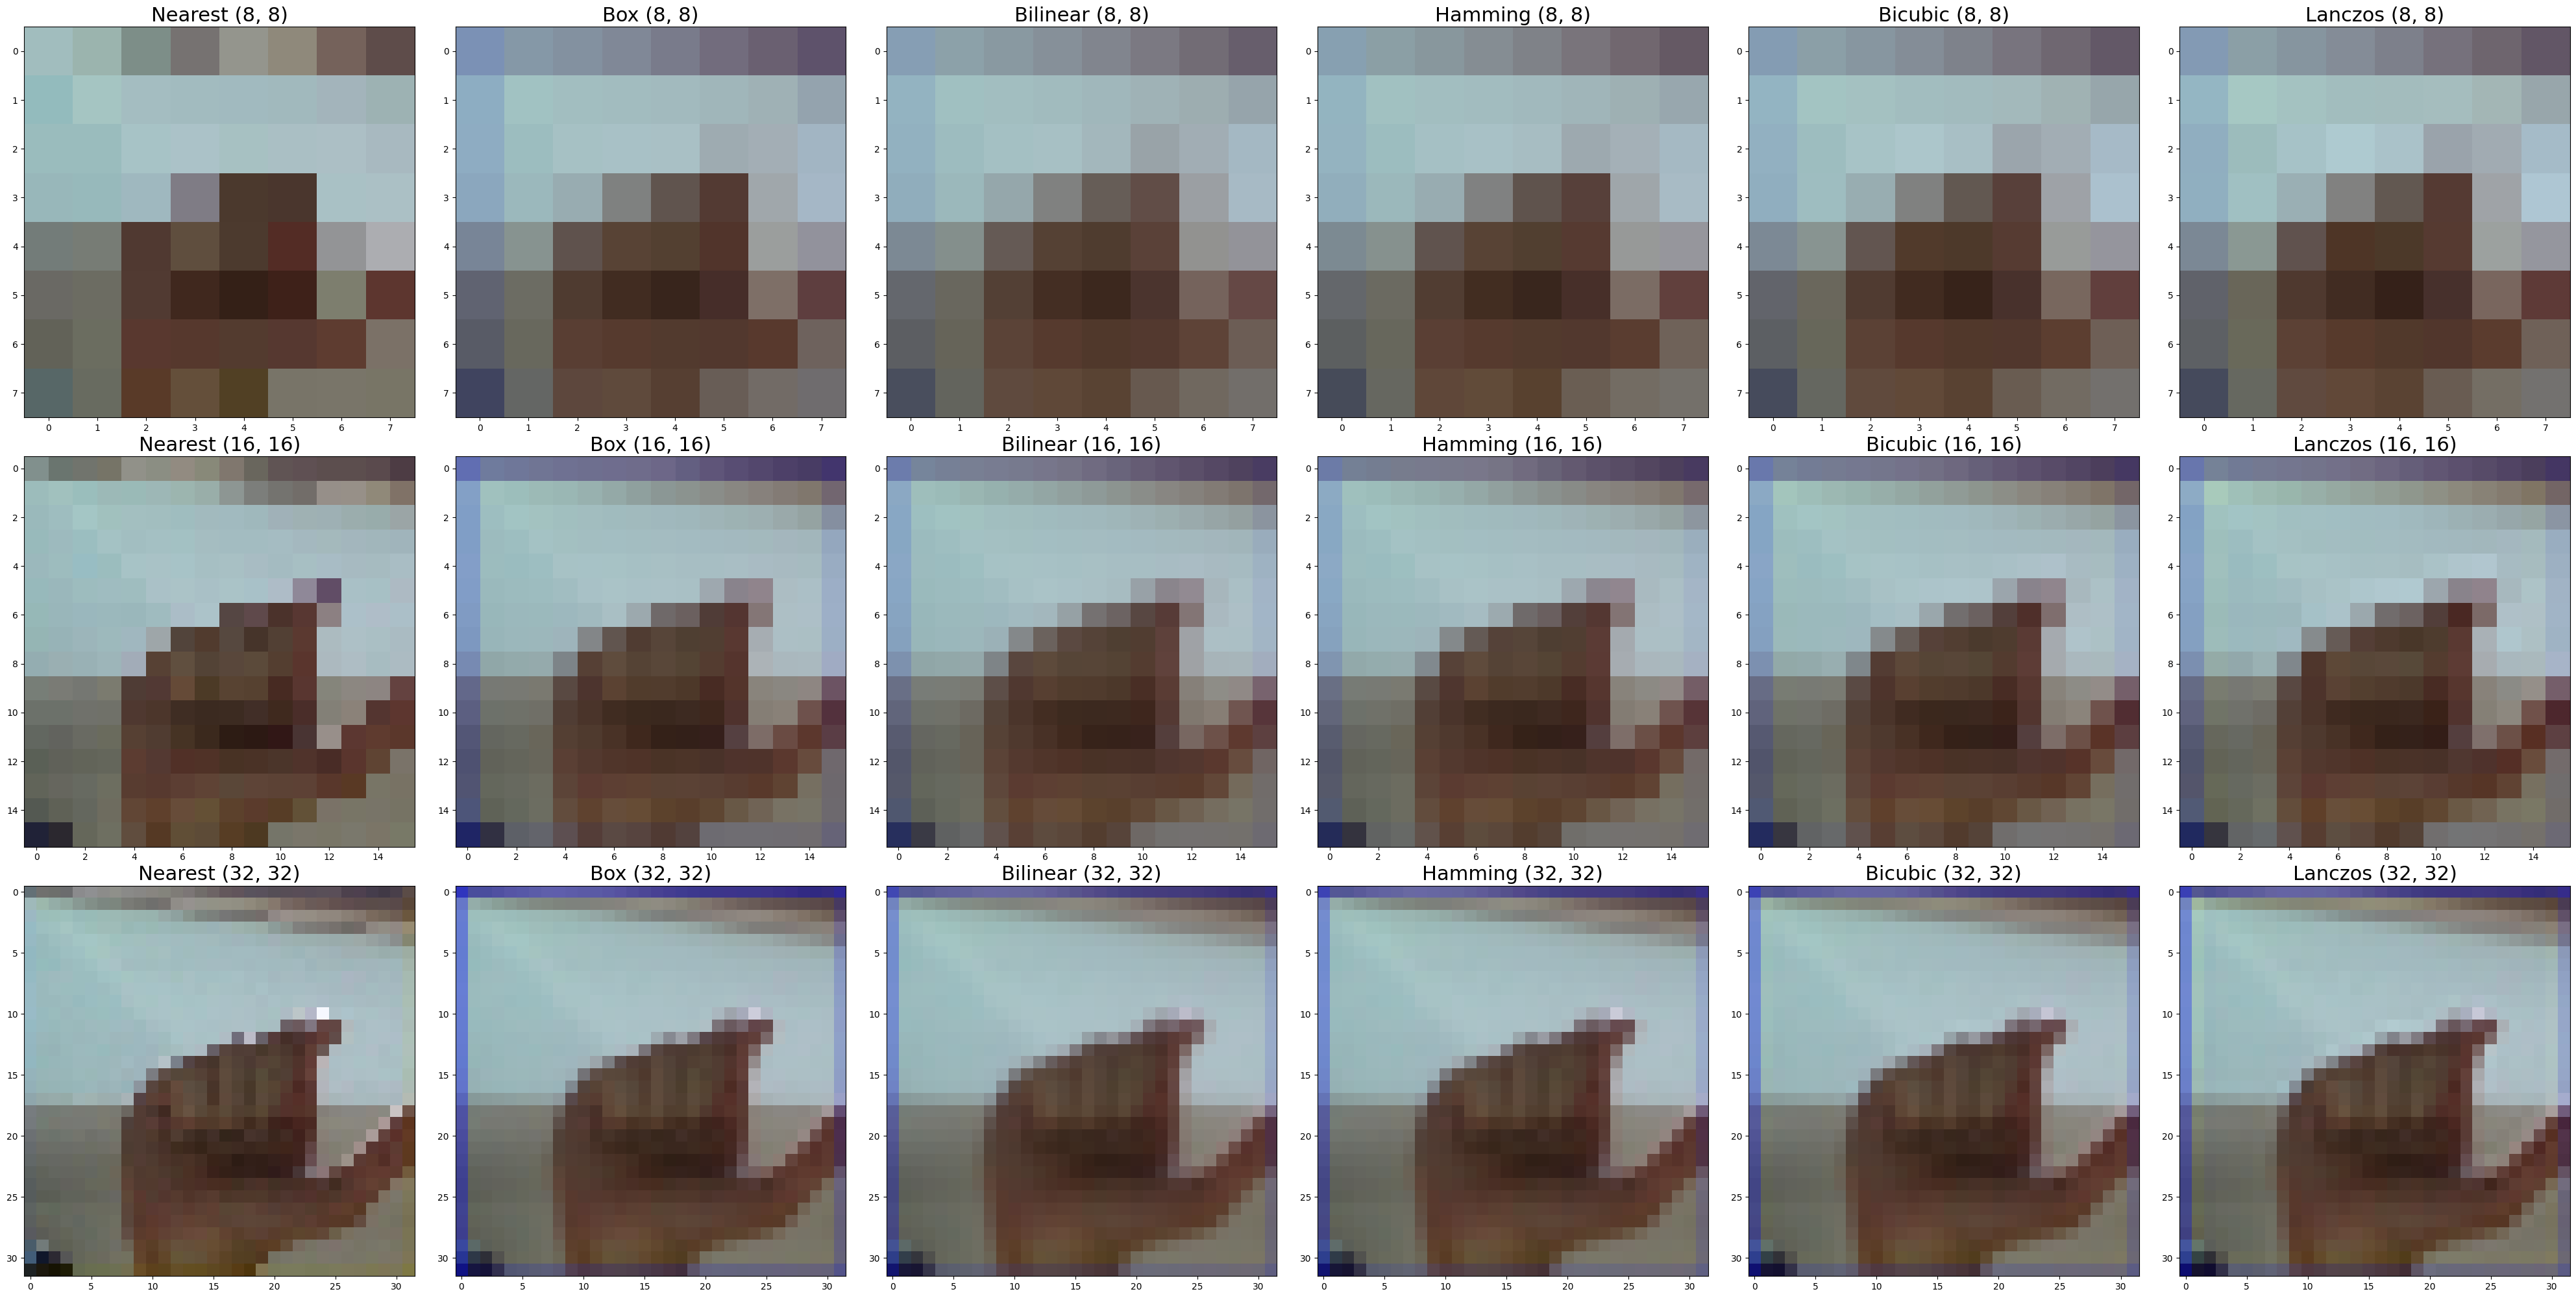

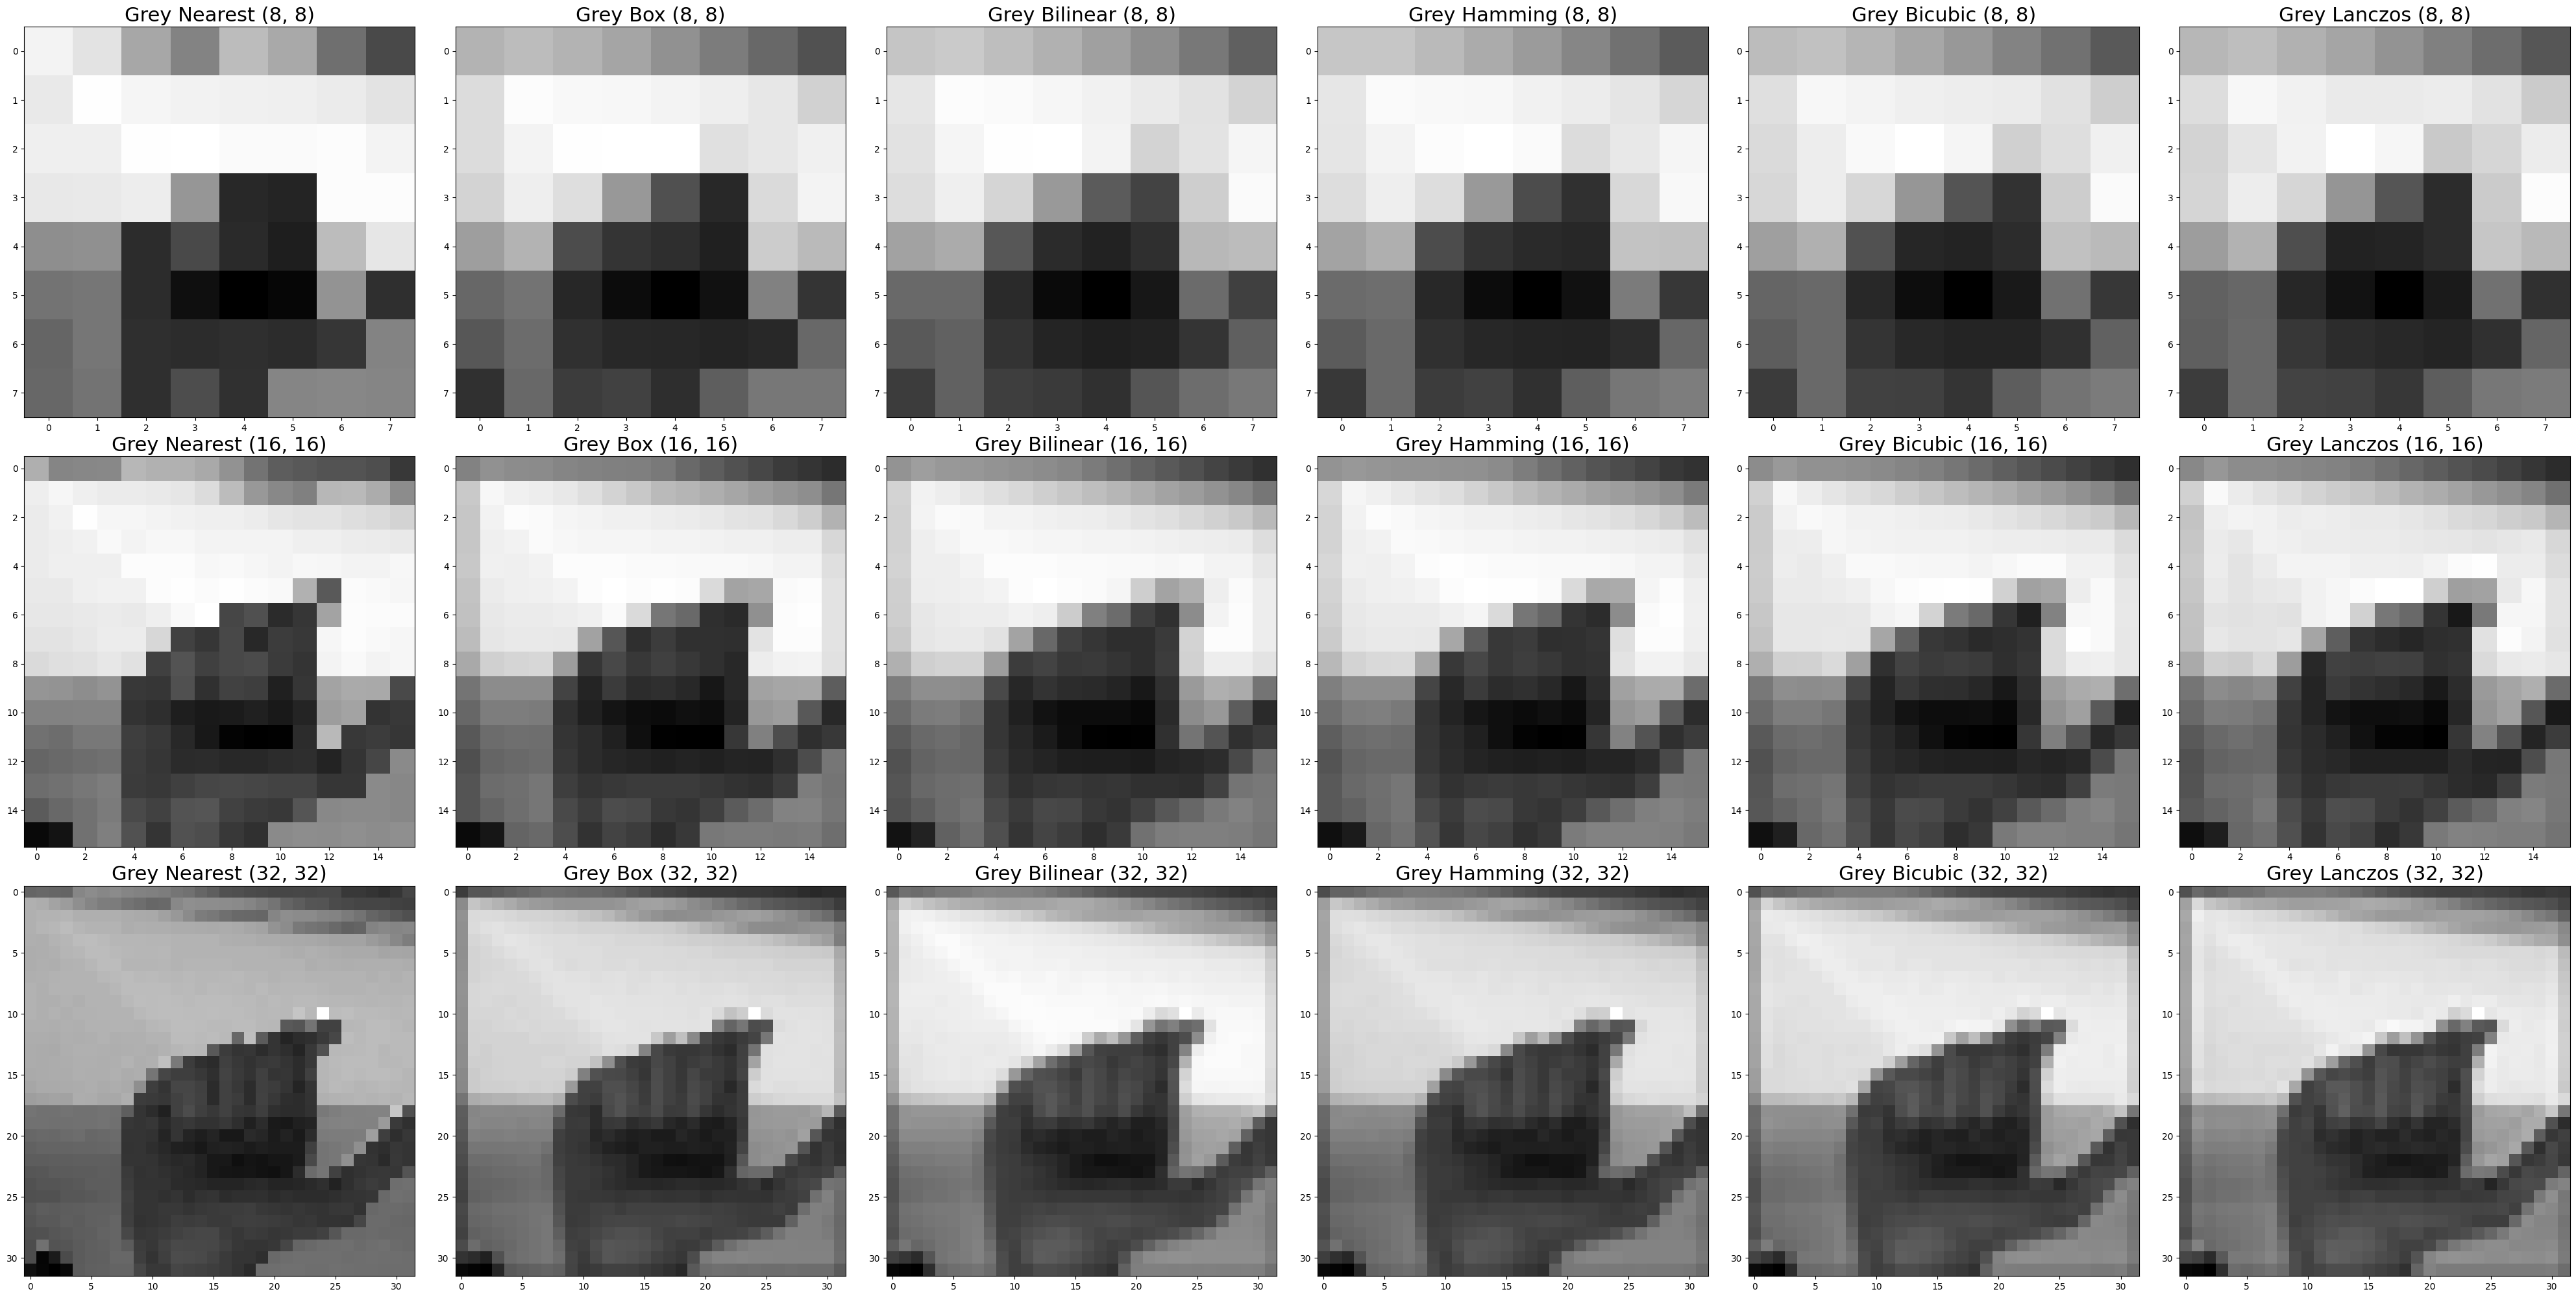

In [35]:
from PIL import Image
from PIL.Image import Resampling
image = Image.open(path)

filters = [Resampling.NEAREST, Resampling.BOX, Resampling.BILINEAR, Resampling.HAMMING, Resampling.BICUBIC, Resampling.LANCZOS]
fil_names = ["Nearest", "Box", "Bilinear", "Hamming", "Bicubic", "Lanczos"]
sizes = [(8,8), (16,16), (32, 32)]

def show_resized(gray=False):
    plt.figure(figsize=(40, 20))
    for i, size in enumerate(sizes, start=1):
        for j, fil in enumerate(filters, start=1):
            subplot_index = (i - 1) * len(filters) + j
            plt.subplot(len(sizes), len(filters), subplot_index)
            resized = image.resize(size, resample=fil)
            title = fil_names[j - 1] + " " + str(size)
            showim = resized
            if gray:
                title = "Grey " + title
                showim = showim.convert('L')
            plt.imshow(showim, cmap='gray')
            plt.title(title, fontsize=22)
    plt.tight_layout()
    plt.show()

show_resized()
show_resized(True)
#resized = image.resize((25,25), resample=Resampling.NEAREST)
#plt.title()
#plt.imshow(resized, cmap='gray')

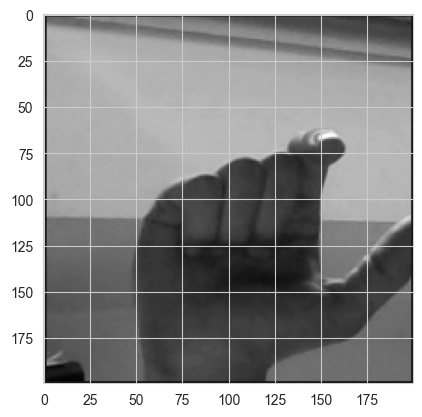

In [6]:
gray = resized.convert('L')

plt.imshow(gray, cmap='gray')

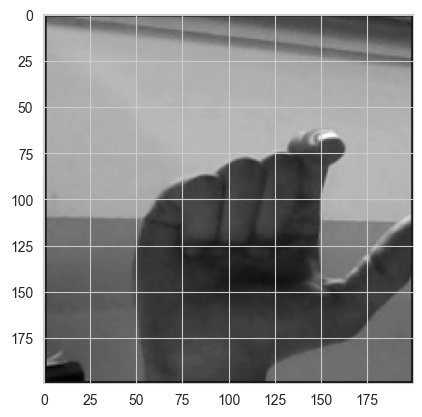

In [7]:
import numpy as np
max_val = np.max(np.max(gray, axis = 1))
normalized_image = gray / max_val

plt.imshow(normalized_image, cmap='gray')

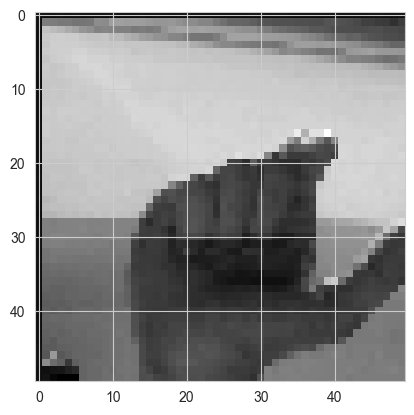

In [11]:
small_image = normalized_image[::4, ::4]

plt.imshow(small_image, cmap='gray')

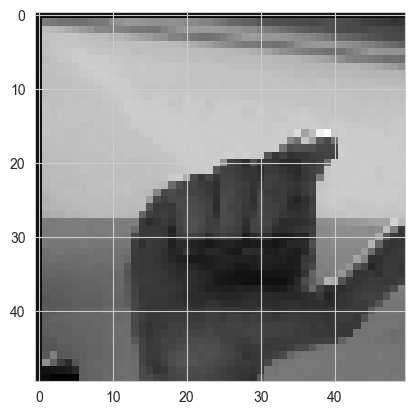

In [10]:
bottom_left = normalized_image[::4, ::4]
top_left = normalized_image[1::4, ::4]
top_right = normalized_image[1::4, ::4]
bottom_right = normalized_image[::4, 1::4]

averaged_small_image = (bottom_left + bottom_right + top_left + top_right)/4
plt.imshow(averaged_small_image, cmap='gray')

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=400)
pca_result = pca.fit_transform(averaged_small_image.reshape(1,-1))

plt.imshow(pca_result.reshape((20,20)), cmap='gray')


ValueError: n_components=400 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'